RMS Error            alpha
[0.65957881763424564, 1.0]
[0.65786109188085906, 0.1]
[0.65761721446402432, 0.010000000000000002]
[0.65752164826417558, 0.0010000000000000002]
[0.65741906801092909, 0.00010000000000000002]
[0.6573941628851252, 1.0000000000000003e-05]
[0.65739130871558571, 1.0000000000000004e-06]


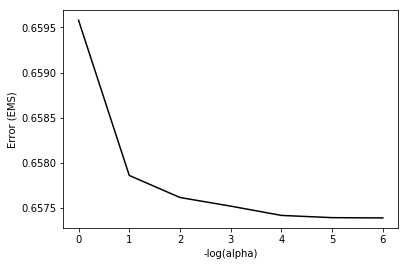

In [8]:
from urllib.request import urlopen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from math import sqrt

target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
data = urlopen(target_url)
xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        line = line.decode('utf-8')
        names = line.strip().split(";")
        firstLine = False
    else:
        
        line = line.decode('utf-8')
        row = line.strip().split(";")
        labels.append(float(row[-1]))
        row.pop()
        floatrow = [float(num) for num in row]
        xList.append(floatrow)

indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0]
xListTrain = [xList[i] for i in indices if i%3 != 0]
yListTest = [labels[i] for i in indices if i%3 == 0]
yListTrain = [labels[i] for i in indices if i%3 != 0]

x_train = np.array(xListTrain)
x_test = np.array(xListTest)
y_train = np.array(yListTrain)
y_test = np.array(yListTest)

alphaList = [0.1**i for i in range(7)]
rmsError = []
for alph in alphaList:
    wineRidgeModel = Ridge(alpha = alph)
    wineRidgeModel.fit(x_train,y_train)
    rmsError.append(np.linalg.norm((y_test-wineRidgeModel.predict(x_test)),2)/sqrt(len(y_test)))
print("RMS Error            alpha")
for i in range(7):
    print([rmsError[i],alphaList[i]])

# plot curve of test sample error versus alpha
x = range(7)
plt.plot(x,rmsError,'k')
plt.xlabel('-log(alpha)')
plt.ylabel('Error (EMS)')
plt.show()

6


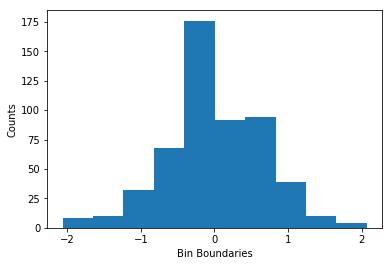

In [13]:
# plot histogram of test errors for best alpha value
indexBest = rmsError.index(min(rmsError))
print(indexBest)
wineRidgeModel = Ridge(alpha = alphaList[indexBest])
wineRidgeModel.fit(x_train,y_train)
errorVector = y_test-wineRidgeModel.predict(x_test)
plt.hist(errorVector)
plt.xlabel("Bin Boundaries")
plt.ylabel("Counts")
plt.show()

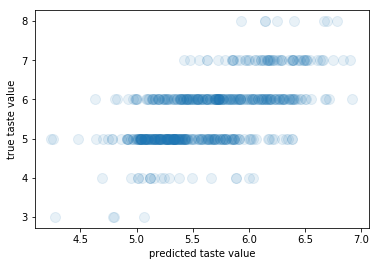

In [14]:
# scatter plot of prediction on test dataset and their true values
plt.scatter(wineRidgeModel.predict(x_test),y_test,s=100,alpha=0.1)
plt.xlabel("predicted taste value")
plt.ylabel("true taste value")
plt.show()